# 2324-MA378 Lab 1 - SOLUTIONS to Exercises 2, 3 and 4

* **Name**: Niall Madden [Change this to your name before submitting!! Unless, of course, that is your name.]
* **Collaborated with**: ???? [Name anyone you worked with on this]
* **ID**: 01234567 [Change this to your ID. Unless, of course... ]
* `Email`:  n.madden321@universityofgalway.ie [Change this to your email address]
* **Date**: Feb 024

Upload your script with solutions to Exercises 1, 2, 3 and 4 to Canvas ... 2324-MA378... Assignment... Lab 1) by 5pm, Friday 9th Feb

## Collaboration
You are encouraged to work with class-mates on this lab. It is OK for people who've worked together to submit identical work, subject to the following conditions.
1. You submit a copy of the notebook
2. You give your name and ID at the top of the first makrdown cell. 
3. You list anyone you collaborated with.

## Grading
This part of the module is about encouraging engagment. It is not meant to be too demanding of your time, but to give you a framework to expieriment, which is what all numerical analysist do, all the time.

* So, if you submit a notebook that shows a reasonable effort (and includes your name + ID), you'll score 3/3.
* If you submit something that does not show any effort, you score 1/3.
* If you submit nothing, you score nothing.

## A MATLAB primer
You are using a Juputer Notebook runing an Octave kernel. For more on getting started with Octave/MATLAB, please work through the MATLAB primer at https://www.niallmadden.ie/2324-MA378/OctavePrimer.html (html version) or
https://www.niallmadden.ie/2324-MA378/OctavePrimer.ipynb (Jupyter notebook).

***

## Defining the function that we will interpolate

In MATLAB/Octave, we can define functions using the `@` symbol. The syntax is:<br>
`function_name = @(var)(expression involving var).`<br>
Here the expession can be anything, but usually involves
* the standard arithmetic operators: `+`, `-`, `*` and `/`. However, we will often write `.*` and `./` for multiplication and division so that these are done "*entrywise*" for vectors.
* standard mathematics functions, such as `log()`, `exp()`, `sin()`, `cos()`, `abs()`, etc.


In this first example, we will define $f(x)=e^{\cos(x/2)}$.


In [1]:
f = @(x)(exp(cos(x/2)));


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.



Let's plot this on the interval $[-5,5]$.

In [ ]:
fplot(f,[-5,5]);
title('Plot of exp(cos(x/2)');

***

## Computing the interpolant

We could compute the interpolant to this function using Lagrange Interpolation. But MATLAB and Octave have built-in functions for this, which we want to use.
The two main functions we use are:
* `polyfit(x,y,n)` which returns the coefficients of the polynomial of degree `n` that inpterpolates the points `(x(1),y(1))`, `(x(2),y(2)`, .... . If we set `C = polyfit(x,y,n)` then `C` is a vector with `n+1` entries. `C(1)` is the coeficient of $x^n$, `C(2)` is the coefficient of $x^{n-1}$, etc. However, we usually just want to compute `C`, and don't really care what the actual coefficents are.

* `polyval(C,X)` evaluates the polynomial represented by `C` at the points `X`. So `Y = polyval(C,X)` would set `Y(i)` to be the value of the polynomial, represented by `C`, at `X(i)`.

### Defining the problem
For any interpolation problem, we eed to choose the end points `a` and `b`:

In [ ]:
a = -5; b = 5; % Approximate f(x) in the interval [a,b]=[-5,5].

Next, we choose $n$, the degree of the interpolating polynomial. Note that we'll have $n+1$ interpolation points.

In [ ]:
n = 2; % degree of the interpolation polynomial.

Next define the interpolation points:

In [ ]:
x = linspace(a, b, n+1) % interpolation points x(1), x(2), ..., x(n+1)

Finally, define the vector of values to be interpolated.

In [ ]:
y = f(x);

Now that we have the data, we can actually do the interpolation.

In [ ]:
C = polyfit(x,y,n);

***

## Plotting the function and its interolant

We'll define `X` to be a vector of 1000 points between $a$ and $b$. This is just to help with plotting.

In [ ]:
X = linspace(a, b, 1000);  % X is a list of 1000 points in [a,b]

To plot:

In [ ]:
plot(x,y, 'o', X, f(X), X, polyval(C,X), '--', ...
    'LineWidth',3, 'MarkerSize', 10)
legend('points', 'f', 'p_n');
title('f(x) and p_n(x)');

***

## Calculating and plotting the error

The error at a given $x$ is $E(x)=|f(x)-p_n(x)|$. We'll define the vector of errors:

In [ ]:
E = abs(f(X)-polyval(C,X));

The maximum value is:

In [ ]:
disp(max(E))

We can also plot it:

In [ ]:
plot( X, E, '--')
title('Error: f(x)-p_n(x)');

***
***

# Exercise 1

Change the data at the top of this sheet to your name, ID, and email address, and the names of any collaborators.
    

# Exercise 2

Copy into the cell below  the code for 
* defining $f$, $a$, $b$, $n$, 'x', 'y';
* computing `C`, the interpolant to $f(x)=e^{\cos(x/2)};
* and for computing the maximum error; that is, compute `E` and display its maximum value.

Then experiment to find the smallest value of `n` for which $E(x) \leq 10^{-3}$, for all $x \in [a,b]$.

Ignore any warnings about the polynomial being "*badly conditioned*". Generally, you should note that, as $n$ increases, the maximum error decreases.  

**Solution to Exercise 2**

In [2]:
# Your solution to Exercise 2 goes in this cell.

f = @(x)(exp(cos(x/2)));
a = -5; b = 5; % Approximate f(x) in the interval [a,b]=[-5,5].
n = 18; % with n=18, we get an error less than 1e-3
x = linspace(a, b, n+1);
y = f(x);   % the points to interpolate
C = polyfit(x,y,n); 

X = linspace(a, b, 1000);  % might need this line again

E = abs(f(X)-polyval(C,X));
disp(max(E))

7.9972e-04


***
***

# Exercise 3

Exercise 2 (and the Weierstrass Interpolation theorem) might suggest that, for any $f$, we can make the error as small as we want by taking large enough $n$. However, that is not true, at least if equally spaced points are used. 

To see this, change the definition of the function to $f(x)=\frac{1}{1+x^2}$. In MATLAB this is:

Demonstrate that, as `n` increases, so too does the error. For example, determine the smallest value of `n` for which the error is **greater** than 1. How about greater than 10? Or 100? or 1,000?

**Solution to Exercise 3** I don't expect students to use a loop, but it handy for this demonstration.

In [3]:
# Your solution to Exercise 3 goes in this cell.

f = @(x)(1./(1+x.^2));
a = -5; b = 5; % Approximate f(x) in the interval [a,b]=[-5,5].

for n = 2:20 % with n=18, we get an error less than 1e-3
   x = linspace(a, b, n+1);
   y = f(x);   % the points to interpolate
   C = polyfit(x,y,n);
   E = abs(f(X)-polyval(C,X));
   disp([n, max(E)])
end

   2.0000   0.6462
   3.0000   0.7070
   4.0000   0.4383
   5.0000   0.4327
   6.0000   0.6169
   7.0000   0.2473
   8.0000   1.0452
   9.0000   0.3003
   10.0000    1.9156
   11.0000    0.5567
   12.0000    3.6629
   13.0000    1.0701
   14.0000    7.1923
   15.0000    2.1069
   16.000   14.387
   17.0000    4.2234
   18.000   29.186
   19.0000    8.5754
   20.000   59.768


***
***

# Exercise 4

Instead of using equally spaced points, try choosing the points by hand. Start with just three points: $x_0=-5$, $x_1=0$, and $x_2=5$. 

Next choose $x_3$ and $x_4$ in a way that you think will reduce the error. 

And then choose $x_5$ and $x_6$, and so on. Using about 20 points you should be able to get the error close to $10^{-2}$.

*Tip*: Since the function is symmetric about $x=0$, just define, say, the points on  and then extend to  as follows:

`x = [-5, -3, 0];`

`x = union(x,-x);`

*Another tip*: In previous exercises, we would choose `n`, and that would determine the values for `n`. In this Exercise, we are choosing the points in `x`, which determines the degree of the polynomial. So, after defining `x`, you need to set the value of `n`. That can be done as follows:

`n = length(x)-1;`

**Solution to Exer 4.** This works for me, but students will find their own numbers.

x =

 Columns 1 through 8:

  -5.0000  -4.6970  -4.1000  -3.1800  -2.1000  -1.0000        0   1.0000

 Columns 9 through 13:

   2.1000   3.1800   4.1000   4.6970   5.0000

n = 12
   1.2000e+01   9.1003e-02


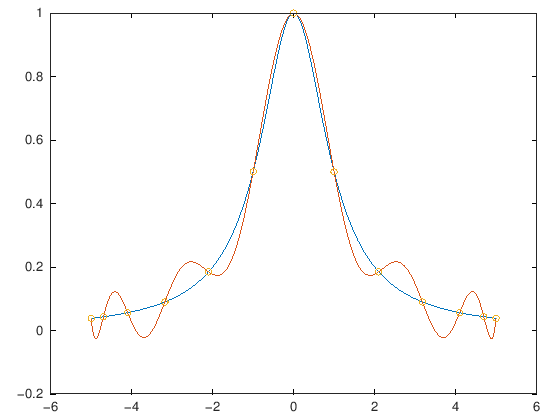

In [8]:
# Your solution to Exercise 4 goes in this cell.
f = @(x)(1./(1+x.^2));
a = -5; b = 5; % Approximate f(x) in the interval [a,b]=[-5,5].
x = [-5, 0, -2.1, -4.1,-4.697, -3.18,  -1];
x = union(x,-x)
n = length(x)-1

y = f(x);   % the points to interpolate
C = polyfit(x,y,n);
E = abs(f(X)-polyval(C,X));
disp([n, max(E)])
plot(X, f(X), X, polyval(C,X), x, f(x), 'o')


***

## Bonus Exercise
You don't have to submit a solution to this part. But if you have time, please try it out.  

Although we won't cover it in class, Chebyshev showed that, in general, one should choose points given by the formula: 
$x_i = \frac{b-a}{2}\cos\bigg( \frac{(i + \frac{1}{2})\pi}{n+1}\bigg) + \frac{b+a}{2}$, for $i=0, 1, \dots, n$.

Try this for various $n$ and test if it works: as $n$ increases, you should observe that the error decreases.

If you are interested, see Sections 8.4 and 8.5 of Suli and Mayers' "An Introduction to Numerical Analysis". 